In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [13]:
data = pd.read_csv('3.01. Country clusters.csv')

(-90, 90)

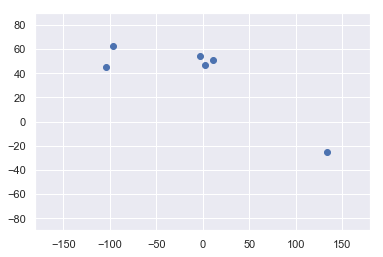

In [15]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)

In [16]:
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

In [31]:
kmeans = KMeans(3)

In [32]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Results

In [33]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [34]:
data_with_clusters = data
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Identified Clusters,Clusters
0,USA,44.97,-103.77,English,0,2
1,Canada,62.40,-96.80,English,0,2
2,France,46.75,2.40,French,0,0
3,UK,54.01,-2.53,English,0,0
4,Germany,51.15,10.40,German,0,0
5,Australia,-25.45,133.11,English,1,1


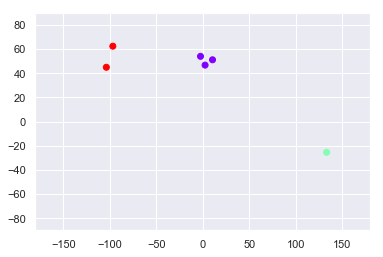

In [35]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()